In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [54]:
df = pd.read_csv(r"D:\Data Analysis\Assignments\Census-Income-project-Extra-Data-sets\popdata (3).csv")

In [55]:
df.head()

,value,date
0,127299.0,1952-01-01
1,127517.0,1952-02-01
2,127721.0,1952-03-01
3,127933.0,1952-04-01
4,128130.0,1952-05-01


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   816 non-null    float64
 1   date    816 non-null    object 
dtypes: float64(1), object(1)
memory usage: 12.9+ KB


In [57]:
df['date']

0      1952-01-01
1      1952-02-01
2      1952-03-01
3      1952-04-01
4      1952-05-01
          ...    
811    2019-08-01
812    2019-09-01
813    2019-10-01
814    2019-11-01
815    2019-12-01
Name: date, Length: 816, dtype: object

In [58]:
df['date'] = pd.to_datetime(df['date'])

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   value   816 non-null    float64       
 1   date    816 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.9 KB


In [60]:
df.head()

,value,date
0,127299.0,1952-01-01
1,127517.0,1952-02-01
2,127721.0,1952-03-01
3,127933.0,1952-04-01
4,128130.0,1952-05-01


In [61]:
df.index

RangeIndex(start=0, stop=816, step=1)

In [62]:
df.index = df['date']
df.head()

,value,date
date,,
1952-01-01,127299.0,1952-01-01
1952-02-01,127517.0,1952-02-01
1952-03-01,127721.0,1952-03-01
1952-04-01,127933.0,1952-04-01
1952-05-01,128130.0,1952-05-01


In [63]:
del df['date']
df.head()

,value
date,
1952-01-01,127299.0
1952-02-01,127517.0
1952-03-01,127721.0
1952-04-01,127933.0
1952-05-01,128130.0


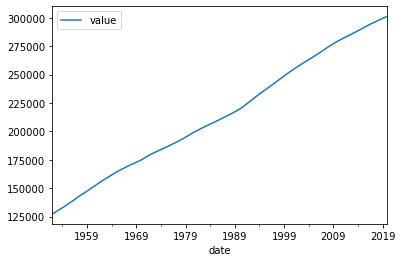

In [64]:
df.plot()
plt.show()

In [65]:
from statsmodels.tsa.stattools import *
result = adfuller(df['value'])
print('p-value: %f' % result[1])
if result[1] > 0.05:
    print('not-sationary')
else:
    print('stationary')

p-value: 0.855530
not-sationary


In [66]:
stats,p,lags,critical_values=kpss(df['value'])
print(p)
if p>0.05:
    print('stationary')
else:
    print('not-stationary')

0.01
not-stationary


C:\Users\Public\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


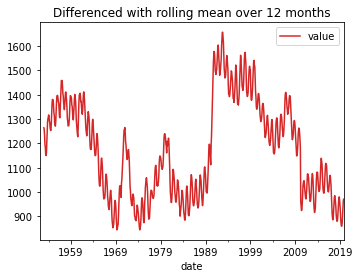

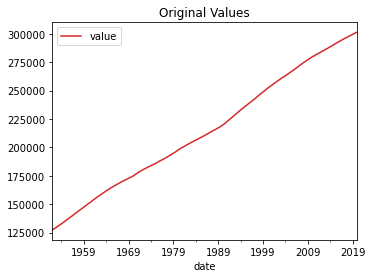

In [67]:
rolling_mean = df.rolling(window=12).mean()
rolling_mean_detrended = df - rolling_mean

ax1 = plt.subplot(121)
rolling_mean_detrended.plot(figsize=(12,4),color="tab:red",
                           title="Differenced with rolling mean over 12 months",
                           ax=ax1)
plt.show()
ax2 = plt.subplot(122)
df.plot(figsize=(12,4),
        color="tab:red",
        title="Original Values",
        ax=ax2
       )
plt.show()

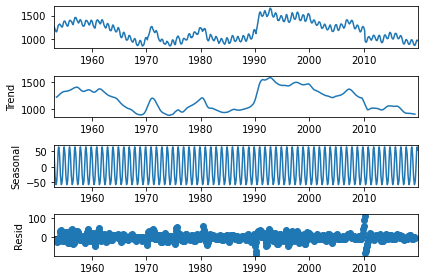

In [68]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(rolling_mean_detrended.dropna())
decompose_result.plot();

In [69]:
rolling_mean_detrended.head(12)

,value
date,
1952-01-01,NaN
1952-02-01,NaN
1952-03-01,NaN
1952-04-01,NaN
1952-05-01,NaN
1952-06-01,NaN
1952-07-01,NaN
1952-08-01,NaN
1952-09-01,NaN


In [70]:
rolling_mean_detrended.shift(2).head(24)

,value
date,
1952-01-01,NaN
1952-02-01,NaN
1952-03-01,NaN
1952-04-01,NaN
1952-05-01,NaN
1952-06-01,NaN
1952-07-01,NaN
1952-08-01,NaN
1952-09-01,NaN


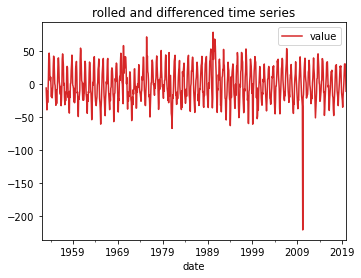

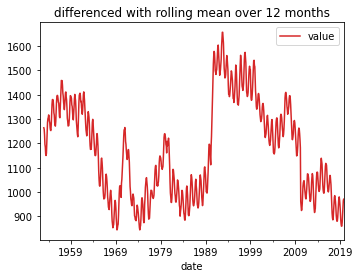

In [71]:
rolling_mean_detrended_diff = rolling_mean_detrended - rolling_mean_detrended.shift()
ax1 = plt.subplot(121)
rolling_mean_detrended_diff.plot(figsize=(12,4),color="tab:red",
                           title="rolled and differenced time series",
                           ax=ax1)
plt.show()
ax2 = plt.subplot(122)
rolling_mean_detrended.plot(figsize=(12,4),
        color="tab:red",
        title="differenced with rolling mean over 12 months",
        ax=ax2
       )
plt.show()

In [72]:
rolling_mean_detrended_diff = rolling_mean_detrended_diff.dropna()

In [73]:
rolling_mean_detrended_diff

,value
date,
1953-01-01,-6.000000
1953-02-01,-23.250000
1953-03-01,-39.166667
1953-04-01,-10.750000
1953-05-01,-28.083333
...,...
2019-08-01,30.416417
2019-09-01,28.615333
2019-10-01,30.239250


In [74]:
result = adfuller(rolling_mean_detrended_diff['value'].dropna())
print('ADF statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical values:')
for key,value in result[4].items():
    print('\t%s: %.3f' % (key,value))

ADF statistic: -5.189488
p-value: 0.000009
Critical values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


In [75]:
result = adfuller(rolling_mean_detrended_diff['value'])
print('ADF statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('No of Lags: ',result[2])
print('No of observations used for ADF regression and critical value calculation ' ,result[3] )
print('Critical values:')
for key,value in result[4].items():
    print('\t%s: %.3f' % (key,value))

ADF statistic: -5.189488
p-value: 0.000009
No of Lags:  21
No of observations used for ADF regression and critical value calculation  782
Critical values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


In [76]:
result = adfuller(rolling_mean_detrended_diff['value'],autolag='AIC')
print('ADF statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('No of Lags: ',result[2])
print('No of observations used for ADF regression and critical value calculation ' ,result[3] )
print('Critical values:')
for key,value in result[4].items():
    print('\t%s: %.3f' % (key,value))

ADF statistic: -5.189488
p-value: 0.000009
No of Lags:  21
No of observations used for ADF regression and critical value calculation  782
Critical values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


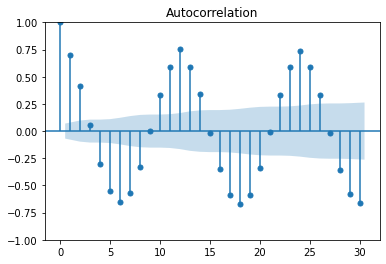

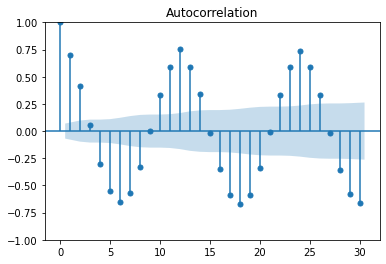

In [77]:
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(rolling_mean_detrended_diff['value'])

In [80]:
from pmdarima import auto_arima

In [83]:
order = auto_arima(rolling_mean_detrended_diff['value'],trace=True)
order.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=6625.482, Time=1.47 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=7594.994, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=7054.960, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=7227.236, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=7593.150, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=7001.209, Time=0.68 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=6898.669, Time=0.65 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=6581.874, Time=1.90 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=6809.062, Time=0.90 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=6583.323, Time=2.69 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=6623.872, Time=2.69 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=6590.561, Time=2.13 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=6781.017, Time=1.09 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=6570.303, Time=2.76 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  804
Model:               SARIMAX(5, 0, 4)   Log Likelihood               -3271.466
Date:                Tue, 13 Dec 2022   AIC                           6564.933
Time:                        12:15:12   BIC                           6616.518
Sample:                    01-01-1953   HQIC                          6584.745
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.1054      0.604     -0.175      0.861      -1.288       1.078
ar.L1          0.4219      0.055      7.702      0.000       0.315       0.529
ar.L2          0.9440      0.052     18.048      0.000       0.841       1.046
ar.L3         -0.3929      0.066     -5.944      0.000      -0.523      -0.263
ar.L4         -0.9407      0.046    -20.386      0.000      -1.031      -0.850
ar.L5          0.3566      0.026     13.751      0.000       0.306       0.407
ma.L1         -0.0565      0.051     -1.104      0.270      -0.157       0.044
ma.L2         -0.9005      0.057    -15.820      0.000      -1.012      -0.789
ma.L3          0.0232      0.058      0.399      0.690      -0.091       0.137
ma.L4          0.8998      0.050     17.886      0.000       0.801       0.998
sigma2       198.7287      2.921     68.028      0.000     193.003     204.454
===================================================================================
Ljung-Box (L1) (Q):                   1.60   Jarque-Bera (JB):             99524.37
Prob(Q):                              0.21   Prob(JB):                         0.00
Heteroskedasticity (H):               1.63   Skew:                            -2.58
Prob(H) (two-sided):                  0.00   Kurtosis:                        57.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [84]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [85]:
train = rolling_mean_detrended_diff.iloc[:651]['value']
test= rolling_mean_detrended_diff.iloc[652:]['value']
model = sm.tsa.arima.ARIMA(train,order=(5,0,4))
model_fit = model.fit()
model_fit.summary()

C:\Users\Public\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Public\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Public\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Public\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  651
Model:                 ARIMA(5, 0, 4)   Log Likelihood               -2586.581
Date:                Tue, 13 Dec 2022   AIC                           5195.162
Time:                        12:27:11   BIC                           5244.425
Sample:                    01-01-1953   HQIC                          5214.268
                         - 03-01-2007                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2148      1.468      0.146      0.884      -2.662       3.091
ar.L1          1.9175      0.120     15.981      0.000       1.682       2.153
ar.L2         -0.3946      0.161     -2.446      0.014      -0.711      -0.078
ar.L3         -1.6771      0.038    -44.206      0.000      -1.752      -1.603
ar.L4          1.3731      0.172      7.966      0.000       1.035       1.711
ar.L5         -0.2572      0.074     -3.457      0.001      -0.403      -0.111
ma.L1         -1.5353      0.108    -14.237      0.000      -1.747      -1.324
ma.L2         -0.1268      0.085     -1.492      0.136      -0.293       0.040
ma.L3          1.5532      0.080     19.506      0.000       1.397       1.709
ma.L4         -0.7919      0.104     -7.631      0.000      -0.995      -0.588
sigma2       166.4357      5.829     28.553      0.000     155.011     177.860
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              1499.40
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               1.19   Skew:                             1.01
Prob(H) (two-sided):                  0.19   Kurtosis:                        10.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\KISHOR WAGH\AppData\Local\Temp\ipykernel_2136\2205509323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rolling_mean_detrended_diff['predict'] = model_fit.predict(start=len(train),


<AxesSubplot:xlabel='date'>

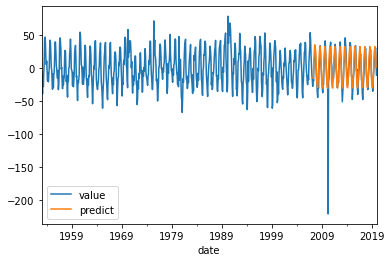

In [86]:
rolling_mean_detrended_diff['predict'] = model_fit.predict(start=len(train),
                                                          end = len(train)+len(test)-1,
                                                          dynamic=True)
rolling_mean_detrended_diff[['value','predict']].plot()

In [87]:
from statsmodels.tsa.statespace.sarimax import SARIMAX,SARIMAXResults
model = SARIMAX(train,order=(1,0,2),seasonal_order=(1,0,2,12))
model = model.fit()

C:\Users\Public\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Public\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


C:\Users\KISHOR WAGH\AppData\Local\Temp\ipykernel_2136\1045402843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rolling_mean_detrended_diff['predict'] = model.predict(start=len(train),


<AxesSubplot:xlabel='date'>

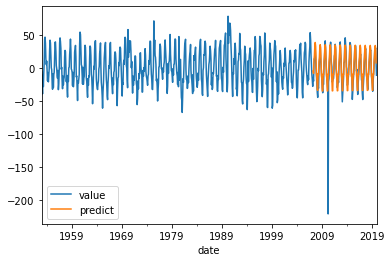

In [88]:
rolling_mean_detrended_diff['predict'] = model.predict(start=len(train),
                                                          end = len(train)+len(test)-1,
                                                          dynamic=True)
rolling_mean_detrended_diff[['value','predict']].plot()

<AxesSubplot:xlabel='date'>

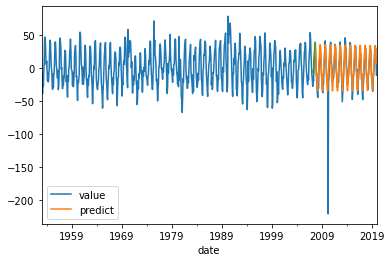

In [89]:
forecast = model.forecast(steps=6)
rolling_mean_detrended_diff.plot()
forecast.plot()